## Optionlib testing

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import optionlib as opt

#### Black-Scholes Options

In [3]:
bs_call = opt.BSOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04, type='C')
bs_call

+1 BSOption(s=100, k=110, t=0.2619, sigma=0.3, r=0.04, type=C)

In [4]:
bs_call.summary()

parameters           characteristics / greeks          
                                                         
0          S       100                    price  2.905939
1          K       110                    delta  0.316638
2         IV       0.3                    gamma  0.023189
3          t  0.261905                     vega  0.182200
4          r      0.04                    theta -0.031740
5                                           rho  0.075303

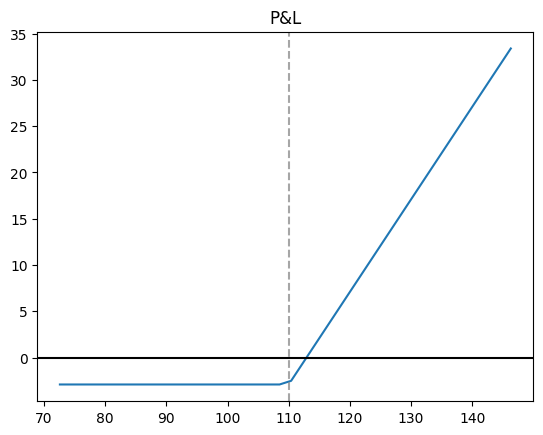

In [5]:
bs_call.plot('pnl')

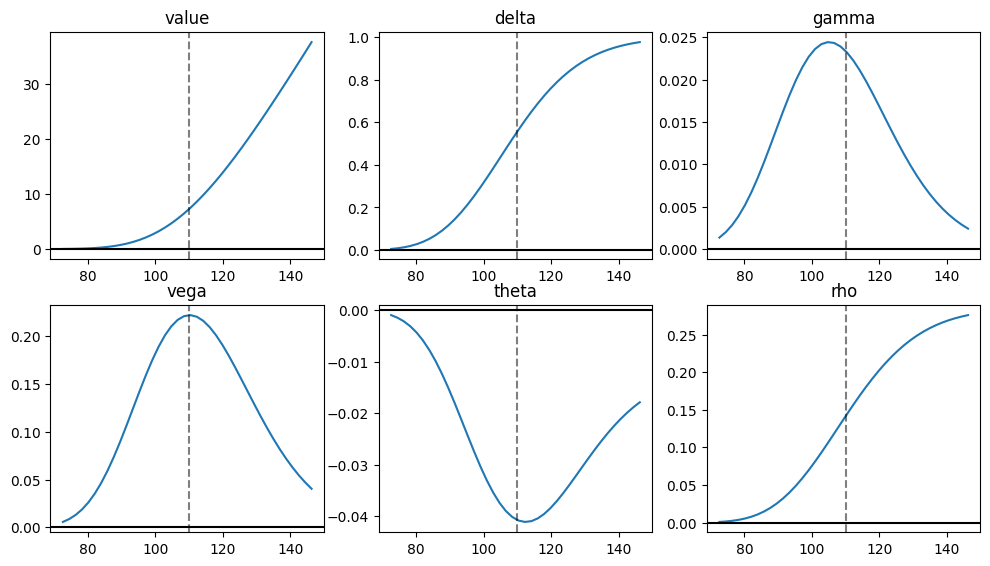

In [6]:
bs_call.plot('summary')

In [7]:
bs_call.plot('delta',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.001), FloatSlider(val…

#### Binomial Tree Options

In [8]:
put = opt.BinomialOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='put',style='A',n=100)
put

+1 BinomialOption(s=100, k=110, t=0.2619, sigma=0.3, r=0.04, type=P, style=A)

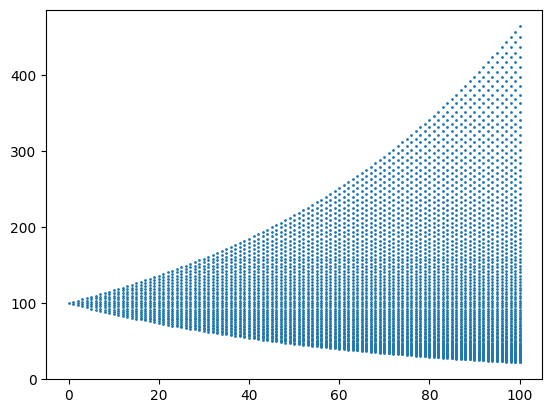

In [9]:
put.show_tree()

In [10]:
put.summary()

greeks            parameters            
                                          
0  price  12.008011          S  100.000000
1  delta  -0.704541          K  110.000000
2  gamma   0.023469         IV    0.300000
3   vega   0.334797          t    0.261905
4                            r    0.040000

In [11]:
put.value(n=500)

12.007702258596158

#### Monte-Carlo Options

In [12]:
mc_call = opt.MCOption(s=100,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='call',N=20,M=2e5,control='all')
mc_call

+1 MonteCarloOption(s=100, k=110, t=0.2619, sigma=0.3, r=0.04, type=C, qty=1, N=20, M=200000)

In [13]:
mc_call.analytics()

,stats
Value,2.906206
N (steps),20.000000
M (simulations),200000.000000
Std. Err.,0.000007
Compute Time (ms),93.270000


#### Option Combinations

##### Basic Combinations

In [14]:
s = 100
call1 = opt.BSOption(s=s,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call2 = opt.BSOption(s=s,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='call')
p = call1 - call2

In [15]:
p.plot('pnl',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.01), Output(layout=La…

In [16]:
p.plot('gamma',interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.01), Output(layout=La…

##### Some more advanced operations

In [17]:
s = 100
call1 = opt.BSOption(s=s,k=90,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call2 = opt.BSOption(s=s,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
call3 = opt.BSOption(s=s,k=110,sigma=0.3,t='03-17-2023',r=0.04,type='call')

In [18]:
portfolio = call1 - (call2*2) + call3
portfolio

OptionPortfolio(
+1 BSOption(s=100, k=90, t=0.2619, sigma=0.3, r=0.04, type=C)
-2 BSOption(s=100, k=100, t=0.2619, sigma=0.3, r=0.04, type=C)
+1 BSOption(s=100, k=110, t=0.2619, sigma=0.3, r=0.04, type=C)
)

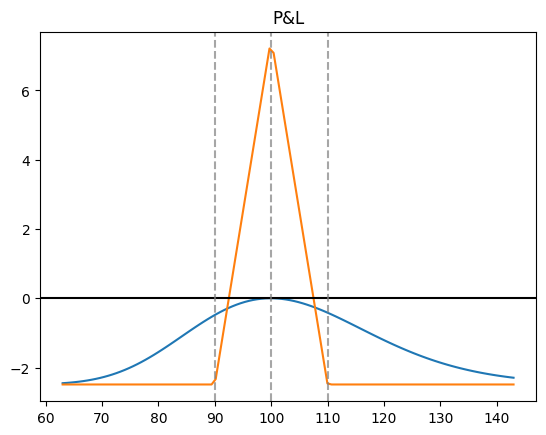

In [19]:
portfolio.plot('pnl',resolution=110)

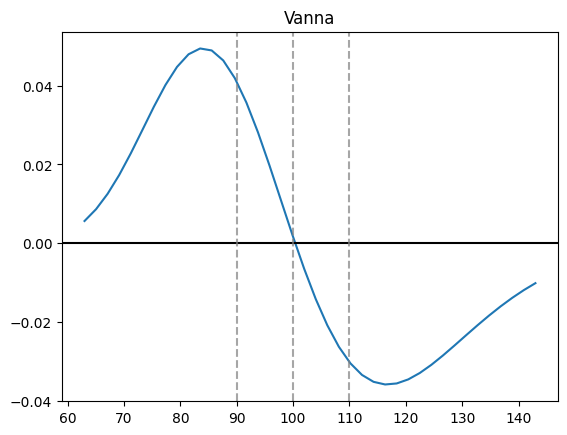

In [20]:
portfolio.plot('vanna')

In [21]:
portfolio.plot('vega',resolution=50,interactive=True)

interactive(children=(FloatSlider(value=2.0, description='t', max=2.0, min=0.001, step=0.01), Output(layout=La…

##### Light Exotics

In [22]:
digi = opt.DigitalOption(s=100,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call')
digi

+1 DigitalOption(s=100, k=100, t=0.2619, sigma=0.3, r=0.04, type=call)

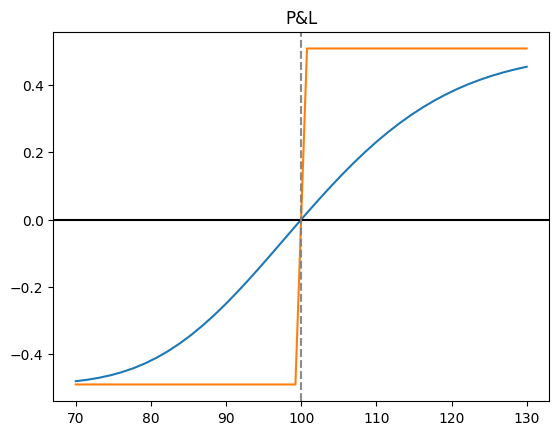

In [23]:
digi.plot()

In [24]:
barrier = opt.BarrierOption(s=100,k=100,sigma=0.3,t='03-17-2023',r=0.04,type='call',barrier=120,barrier_type='KI',N=1,M=1e5,method='mc',control='antithetic')
barrier

+1 BarrierOption(s=100, k=100, t=0.2619, sigma=0.3, r=0.04, barrier=120, barrier_type=KI, type=C, method=mc)

In [25]:
barrier.summary()

greeks           parameters            
                                         
0  price  3.418567          S  100.000000
1  delta  0.146771          K  100.000000
2  gamma -0.005107         IV    0.300000
3   vega  0.117374          t    0.261905
4                           r    0.040000

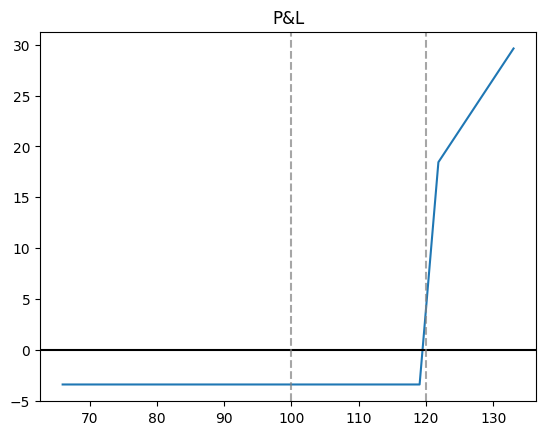

In [26]:
barrier.plot('pnl')

#### Volatility Surface

In [27]:
spy_surf = opt.VolSurface('SPY',moneyness=True) # Moneyness makes strikes in terms of percent ITM or OTM rather than dollar value
# spy_surf = opt.VolSurface('SPY',moneyness=True, source='wallstreet') # If no CBOE access use wallstreet source

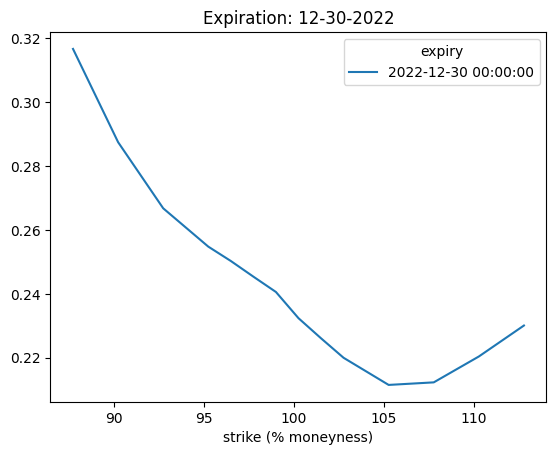

In [33]:
spy_surf.skew_plot(10) # The first call makes it download the data

In [29]:
spy_surf.surface_plot()

In [34]:
spy_surf.surface_table.query('strike > 80 & strike < 120')

expiry,2022-12-12,2022-12-13,2022-12-14,2022-12-15,2022-12-16,2022-12-19,2022-12-20,2022-12-21,2022-12-22,2022-12-23,...,2023-01-20,2023-01-27,2023-02-17,2023-03-17,2023-03-31,2023-04-21,2023-06-16,2023-06-30,2023-09-15,2023-09-29
strike,,,,,,,,,,,,,,,,,,,,,
87.730292,7.9852,0.8955,0.6940,0.5994,0.5407,0.4106,0.3947,0.3809,0.3744,0.3665,...,0.2898,0.2839,0.2814,0.2807,0.2803,0.2787,0.2782,0.2774,0.2763,0.2762
90.236872,6.3714,0.7171,0.5747,0.5194,0.4661,0.3581,0.3460,0.3364,0.3307,0.3248,...,0.2740,0.2708,0.2710,0.2712,0.2712,0.2698,0.2699,0.2694,0.2684,0.2682
92.743452,4.7737,0.5946,0.5037,0.4563,0.4139,0.3260,0.3178,0.3089,0.3047,0.3006,...,0.2614,0.2585,0.2608,0.2612,0.2617,0.2608,0.2612,0.2606,0.2606,0.2606
95.250031,3.1775,0.5582,0.5026,0.4409,0.4100,0.3228,0.3112,0.3006,0.2955,0.2897,...,0.2496,0.2471,0.2503,0.2508,0.2514,0.2510,0.2520,0.2521,0.2526,0.2525
96.503321,2.3719,0.5676,0.5115,0.4467,0.4118,0.3228,0.3106,0.2991,0.2926,0.2849,...,0.2434,0.2413,0.2443,0.2446,0.2457,0.2456,0.2475,0.2474,0.2483,0.2485
97.756611,1.5516,0.5790,0.5203,0.4484,0.4111,0.3224,0.3087,0.2968,0.2892,0.2810,...,0.2368,0.2348,0.2381,0.2387,0.2400,0.2402,0.2425,0.2424,0.2443,0.2444
99.009901,0.6947,0.5787,0.5185,0.4450,0.4050,0.3184,0.3043,0.2924,0.2835,0.2752,...,0.2300,0.2279,0.2317,0.2325,0.2341,0.2349,0.2377,0.2379,0.2401,0.2403
100.263191,0.4271,0.5726,0.5098,0.4368,0.4002,0.3160,0.2999,0.2871,0.2788,0.2700,...,0.2241,0.2219,0.2269,0.2256,0.2283,0.2289,0.2332,0.2337,0.2364,0.2373
101.516481,1.2237,0.5541,0.4952,0.4280,0.3922,0.3086,0.2915,0.2790,0.2701,0.2619,...,0.2177,0.2155,0.2208,0.2194,0.2226,0.2235,0.2282,0.2288,0.2323,0.2331


#### Dealer Gamma

In [35]:
gex = opt.GEX() # Requires CBOE access

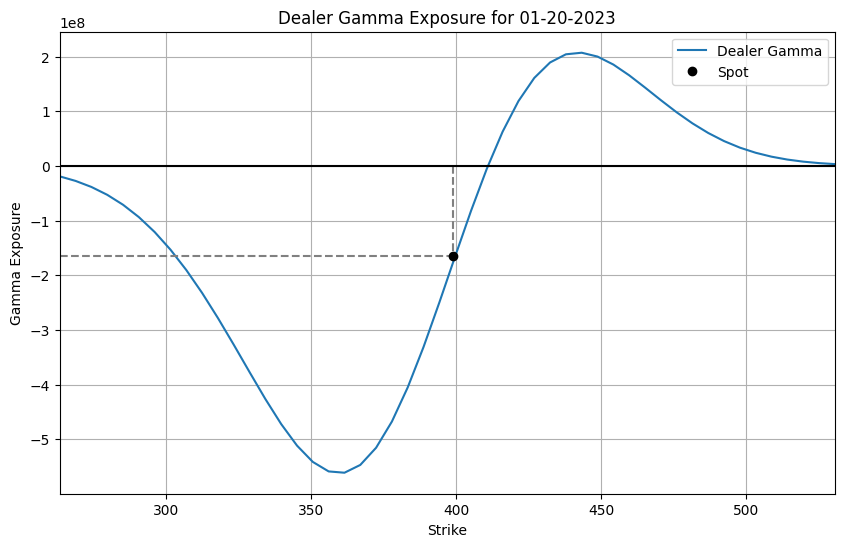

In [37]:
gex.plot('ejan2023')